<a href="https://colab.research.google.com/github/lmoratorio/My_First_LLM/blob/main/BRVJ_(Original).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [482]:
library(dplyr)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(purrr)
library(gridExtra)
library(cowplot)
library(reshape2)
library(geobr)
library(spatialreg)
library(sf)
library(grid)
library(spdep)
library(splm)
library(sp)
library(RColorBrewer)
library(stats)
library(FactoMineR)
library(factoextra)
library(Hmisc)
library(glinternet)
library(glmnet)
library(caret)
library(stargazer)

In [483]:
options(scipen = 999)

In [484]:
estados = read_state(code_state = "all")
municipios <- read_municipality(code_muni = "all")

Using year/date 2010

Using year/date 2010



In [485]:
index = read.csv2("ConsolidadoMunicipio-20230204135317.csv")

In [486]:
index <- index %>%
  dplyr::rename(code_muni = Código.do.IBGE)

In [487]:
mun_mg <- read_municipality(code_muni = 31, year = 2020)

Using year/date 2020



In [488]:
print(mun_mg)

Simple feature collection with 853 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -51.04608 ymin: -22.92276 xmax: -39.85683 ymax: -14.23333
Geodetic CRS:  SIRGAS 2000
First 10 features:
   code_muni           name_muni code_state abbrev_state   name_state
1    3100104 Abadia Dos Dourados         31           MG Minas Gerais
2    3100203              Abaeté         31           MG Minas Gerais
3    3100302          Abre Campo         31           MG Minas Gerais
4    3100401             Acaiaca         31           MG Minas Gerais
5    3100500             Açucena         31           MG Minas Gerais
6    3100609            Água Boa         31           MG Minas Gerais
7    3100708       Água Comprida         31           MG Minas Gerais
8    3100807             Aguanil         31           MG Minas Gerais
9    3100906      Águas Formosas         31           MG Minas Gerais
10   3101003     Águas Vermelhas         31           MG Minas Gerais
  

In [489]:
mun_mg_all = left_join(mun_mg, index, by="code_muni")
mun_mg_all_sem_na <- na.omit(mun_mg_all)

mun_mg_all_sem_na <- mun_mg_all[!is.na(mun_mg_all$Código.do.Município), ]

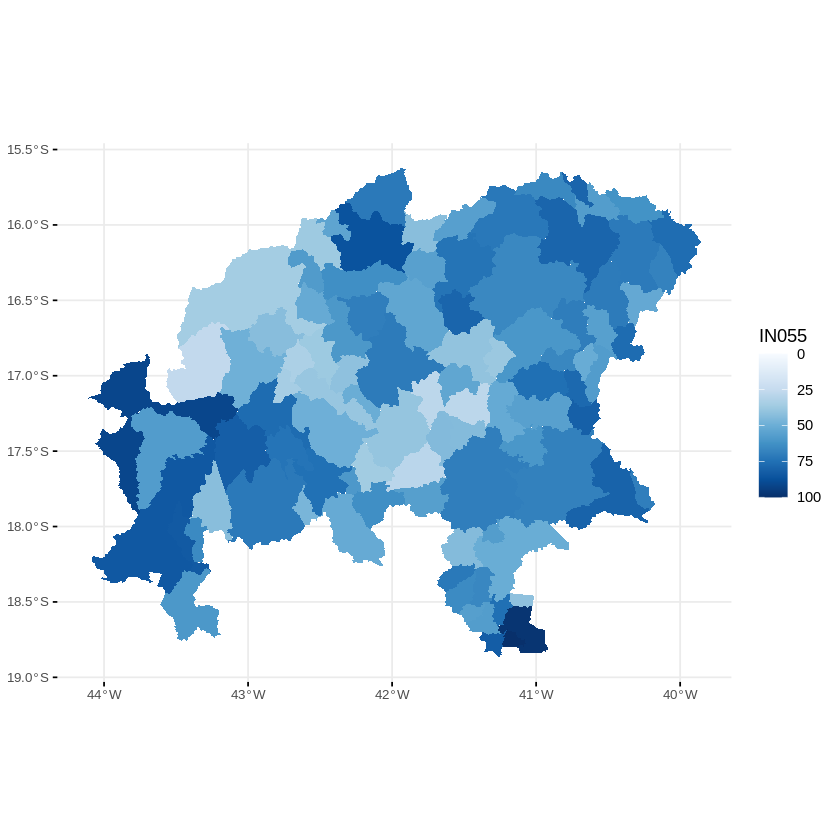

In [490]:
# Remover o tema no_axis para manter as coordenadas
ggplot() +
  geom_sf(data = mun_mg_all_sem_na, aes(fill = IN055_AE...Índice.de.atendimento.total.de.água), color = NA, size = 0.15) +
  labs(title = "",
       caption = '', size = 8) +
  scale_fill_gradientn(colors = rev(brewer.pal(9, "Blues")), limits = c(100, 0), trans = "reverse", name = "IN055") +
  theme_minimal() +  # Mantém o tema minimalista sem remover coordenadas
  theme(
    axis.title.x = element_text(size = 10),  # Adicionar rótulos de eixos se necessário
    axis.title.y = element_text(size = 10),
    axis.text.x = element_text(size = 8),    # Personalizar tamanho do texto das coordenadas
    axis.text.y = element_text(size = 8),
    axis.ticks = element_line(size = 0.5)    # Adicionar ticks nos eixos
  )

In [491]:
mun_mg_all = left_join(mun_mg, index, by="code_muni")
mun_mg_all_sem_na <- na.omit(mun_mg_all)

mun_mg_all_sem_na <- mun_mg_all[!is.na(mun_mg_all$Código.do.Município), ]

no_axis <- theme(axis.title = element_blank(),
                 axis.text = element_blank(),
                 axis.ticks = element_blank())

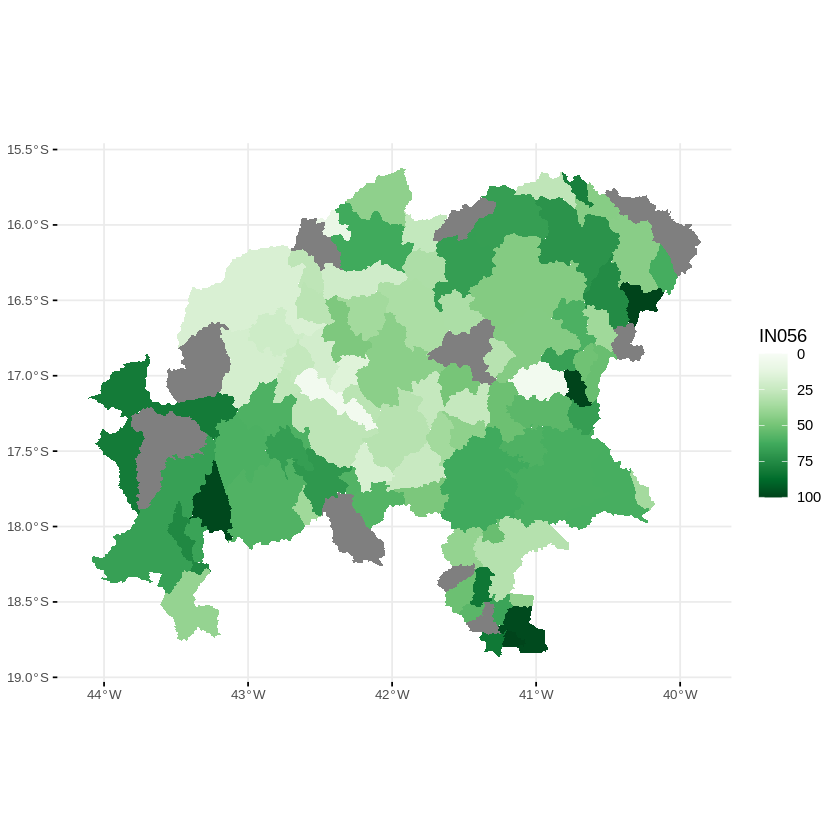

In [492]:
# Remover o tema no_axis para manter as coordenadas e configurar os eixos
ggplot() +
  geom_sf(data = mun_mg_all_sem_na, aes(fill = IN056_AE...Índice.de.atendimento.total.de.esgoto.referido.aos.municípios.atendidos.com.água), color = NA, size = 0.15) +
  labs(title = "",
       caption = '', size = 8) +
  scale_fill_gradientn(colors = rev(brewer.pal(9, "Greens")), limits = c(100, 0), trans = "reverse", name = "IN056") +
  theme_minimal() +  # Mantém o tema minimalista
  theme(
    axis.title.x = element_text(size = 10),   # Adicionar rótulo do eixo X com tamanho de fonte 10
    axis.title.y = element_text(size = 10),   # Adicionar rótulo do eixo Y com tamanho de fonte 10
    axis.text.x = element_text(size = 8),     # Exibir eixos X com tamanho de fonte 8 para coordenadas
    axis.text.y = element_text(size = 8),     # Exibir eixos Y com tamanho de fonte 8 para coordenadas
    axis.ticks = element_line(size = 0.5)     # Adicionar ticks nos eixos
  )

In [493]:
mun_mg_all_sem_na <- as.data.frame(mun_mg_all_sem_na[, -which(names(mun_mg_all_sem_na) == "geom")])
dados_pca <- mun_mg_all_sem_na[,c(1,2, 15:86)]
dados_pca$code_muni <- as.character(dados_pca$code_muni)

In [494]:
colunas_nao_numericas <- which(sapply(dados_pca, class) != "numeric")
nomes_colunas_nao_numericas <- names(dados_pca)[colunas_nao_numericas]

dados_pca <- dados_pca %>%
  mutate_at(vars(-name_muni, - code_muni), as.numeric)

dados_pca <- dados_pca %>%
  select_if(is.numeric) %>%
  mutate_all(~replace(., is.na(.), mean(., na.rm = TRUE)))

In [495]:
old_names <- names(dados_pca)[1:length(names(dados_pca))]

In [496]:
new_names <- substr(old_names, 1, 8)

In [497]:
dados_pca <- dados_pca %>%
  rename_with(~ new_names)

In [498]:
dados_pca <- dados_pca %>%
  rename_with(~ new_names)

In [499]:
normality_test <- lapply(dados_pca, function(x) shapiro.test(x))

In [500]:
p_values <- sapply(normality_test, function(x) x$p.value)

In [501]:
normal_vars <- names(p_values[p_values >= 0.05])

In [502]:
normal_vars

[1] "IN003_AE" "IN031_AE" "IN032_AE" "IN036_AE" "IN049_AE" "IN052_AE" "IN055_AE"
[8] "IN056_AE"

In [503]:
subset_pca <- dados_pca[, names(dados_pca) %in% normal_vars]

summary(subset_pca)

    IN003_AE         IN031_AE        IN032_AE        IN036_AE    
 Min.   : 1.160   Min.   :15.10   Min.   :20.42   Min.   :35.23  
 1st Qu.: 4.115   1st Qu.:36.16   1st Qu.:45.45   1st Qu.:48.84  
 Median : 5.430   Median :44.24   Median :53.58   Median :58.56  
 Mean   : 5.442   Mean   :44.96   Mean   :55.12   Mean   :58.58  
 3rd Qu.: 6.575   3rd Qu.:52.53   3rd Qu.:65.53   3rd Qu.:67.72  
 Max.   :12.940   Max.   :79.00   Max.   :89.77   Max.   :86.17  
    IN049_AE        IN052_AE        IN055_AE         IN056_AE     
 Min.   : 1.85   Min.   :47.99   Min.   : 26.40   Min.   :  3.39  
 1st Qu.:18.23   1st Qu.:68.45   1st Qu.: 49.92   1st Qu.: 33.67  
 Median :25.59   Median :74.41   Median : 59.82   Median : 49.14  
 Mean   :26.08   Mean   :73.92   Mean   : 60.54   Mean   : 49.14  
 3rd Qu.:31.55   3rd Qu.:81.77   3rd Qu.: 71.94   3rd Qu.: 61.34  
 Max.   :52.01   Max.   :98.15   Max.   :100.00   Max.   :100.00  

In [504]:
plots <- subset_pca %>%
  map2(c("IN003", "IN031", "IN032", "IN036", "IN049", "IN052", "IN055", "IN056"), ~ggplot(data = subset_pca, aes(x = .x)) +
        geom_histogram(bins = 30) +
        labs(x = .y, y = ""))

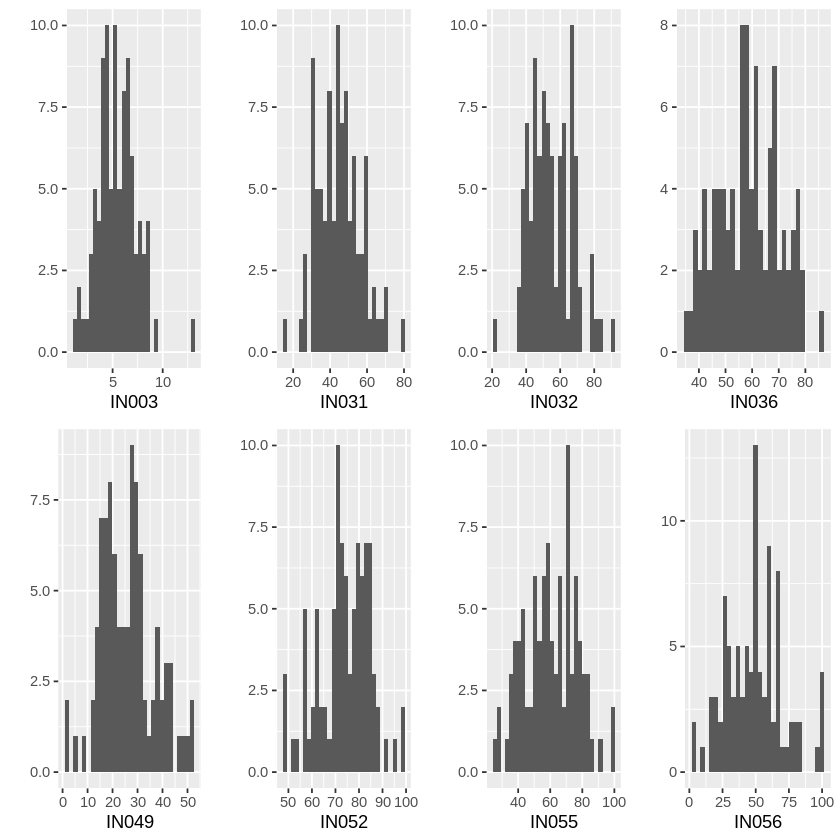

In [505]:
grid.arrange(grobs = plots, ncol = 4)

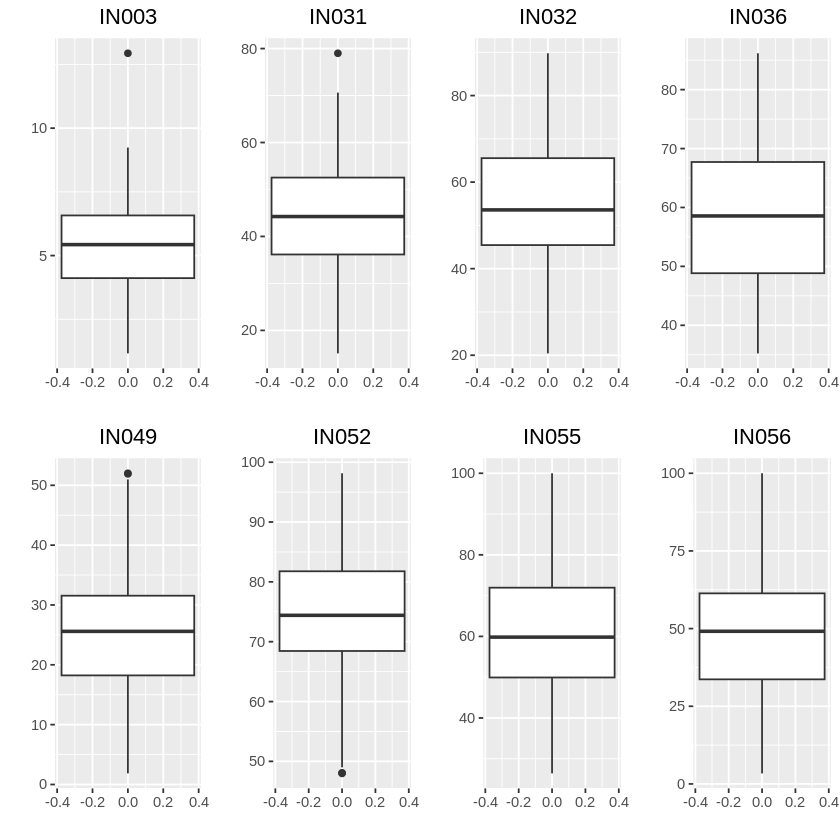

In [506]:
multiplot <- function(..., plotlist = NULL, cols) {

  plots <- c(list(...), plotlist)
  numPlots = length(plots)

  if (!missing(cols)) {
    cols = min(cols, numPlots)
    rows = ceiling(numPlots / cols)
  } else {
    cols = 1
    rows = numPlots
  }

  pushViewport(viewport(layout = grid.layout(nrow = rows, ncol = cols)))

  for (i in 1:numPlots) {
    row = ((i - 1) %/% cols + 1)
    col = ((i - 1) %% cols + 1)
    print(plots[[i]], vp = viewport(layout.pos.row = row, layout.pos.col = col))
  }
}

plots <- subset_pca %>%
  select_if(is.numeric) %>%
  map2(names(subset_pca), ~ggplot(data = subset_pca, aes(y = .x)) +
         geom_boxplot() +
         labs(x = "", y = "", title = sub("_AE", "", .y)) +
         theme(plot.title = element_text(hjust = 0.5)))

multiplot(plotlist = plots, cols = 4)

In [507]:
print(subset_pca)

    IN003_AE IN031_AE IN032_AE IN036_AE IN049_AE IN052_AE IN055_AE  IN056_AE
6       7.32    59.31    67.23    64.41    37.27    62.73    51.63  49.13512
9       5.27    43.37    45.72    67.89    16.85    83.15    75.55   3.76000
18      5.67    38.77    48.35    78.10    13.55    86.45    79.50  71.82000
29      7.10    57.44    67.53    35.23    31.54    68.46    56.54  49.13512
31      3.87    58.54    81.46    55.56    21.36    78.64    59.60  58.65000
37      6.21    35.84    45.04    68.74    29.74    70.26    71.13  43.70000
49      5.25    30.39    39.22    45.98    23.13    76.87    46.79  37.70000
52      7.21    49.58    54.47    74.20    23.91    76.09    50.53  31.07000
57      3.87    47.73    66.82    60.63    38.39    61.61    57.62  44.74000
69      4.29    47.35    60.22    50.47    29.69    70.31    37.64  20.38000
70      3.43    39.75    65.83    61.60    16.67    83.33    58.08  52.94000
78      1.58    46.30    52.52    60.19    42.72    57.28    91.61  81.43000

In [508]:
dados_sem_IN055_AE_e_IN056_AE <- subset_pca %>%
  select(-IN055_AE, -IN056_AE, -IN052_AE)

In [509]:
cor(dados_sem_IN055_AE_e_IN056_AE[, 2:ncol(dados_sem_IN055_AE_e_IN056_AE)])

,IN031_AE,IN032_AE,IN036_AE,IN049_AE
IN031_AE,1.0000000,0.90495112,0.194532547,-0.100064126
IN032_AE,0.9049511,1.00000000,0.016693465,-0.061628273
IN036_AE,0.1945325,0.01669347,1.000000000,-0.002014199
IN049_AE,-0.1000641,-0.06162827,-0.002014199,1.000000000


In [510]:
sapply(dados_sem_IN055_AE_e_IN056_AE, sd)

IN003_AE  IN031_AE  IN032_AE  IN036_AE  IN049_AE 
 1.900812 11.713176 12.637114 11.678371 10.783665

In [511]:
pca_cov <- prcomp(dados_sem_IN055_AE_e_IN056_AE)

In [512]:
summary(pca_cov)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5
Standard deviation     16.9474 11.6788 10.7307 3.42103 1.64931
Proportion of Variance  0.5192  0.2466  0.2082 0.02116 0.00492
Cumulative Proportion   0.5192  0.7658  0.9739 0.99508 1.00000

In [513]:
pca_corr <- prcomp(dados_sem_IN055_AE_e_IN056_AE, center = TRUE, scale = TRUE)

In [514]:
summary(pca_corr)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     1.4666 1.0182 0.9937 0.8696 0.26210
Proportion of Variance 0.4302 0.2074 0.1975 0.1512 0.01374
Cumulative Proportion  0.4302 0.6375 0.8350 0.9863 1.00000

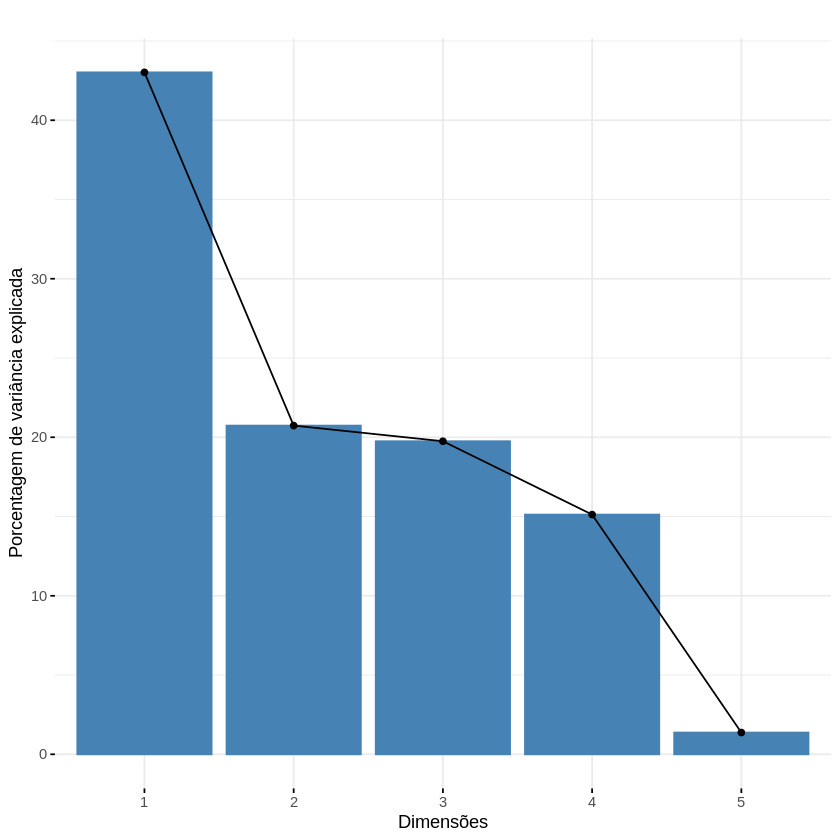

In [515]:
fviz_eig(pca_corr) +
  labs(
    title = "",
    x = "Dimensões",
    y = "Porcentagem de variância explicada"
  )

In [516]:
summary(pca_corr)$rotation

,PC1,PC2,PC3,PC4,PC5
IN003_AE,-0.3929866,0.3420128,0.1063297,0.84090751,-0.10078365
IN031_AE,-0.6532977,-0.1571813,-0.0656200,-0.14642983,0.72301352
IN032_AE,-0.6151867,-0.1625337,-0.2733288,-0.26714604,-0.67011374
IN036_AE,-0.1369751,-0.3867905,0.9013717,-0.03667065,-0.13347385
IN049_AE,0.1467882,-0.8260129,-0.3117827,0.44578148,0.01504699


In [517]:
summary(pca_corr)$x

,PC1,PC2,PC3,PC4,PC5
6,-1.6941217873,-1.06012045,-0.11086918,0.83973212,0.09303002
9,0.3471076364,0.51046210,1.18798636,-0.26824891,0.29015689
18,0.2282686388,0.52495371,2.06269753,-0.25786035,-0.27575203
29,-1.2946896456,0.32688858,-2.20571956,0.61419745,0.29886514
31,-1.7433962938,-0.34176962,-0.83039833,-1.60762742,-0.44720815
37,0.7713417024,-0.22611877,0.99038513,0.78629644,-0.18015388
49,1.7340883460,1.00927072,-0.47247651,0.35098347,0.09386100
52,-0.8042078904,-0.08612066,1.35536653,0.59942557,0.04436025
57,-0.2554356918,-1.48080677,-0.55425087,-0.47492568,-0.37233305
69,0.0009603447,-0.31234143,-0.91851639,-0.47258995,0.03590359


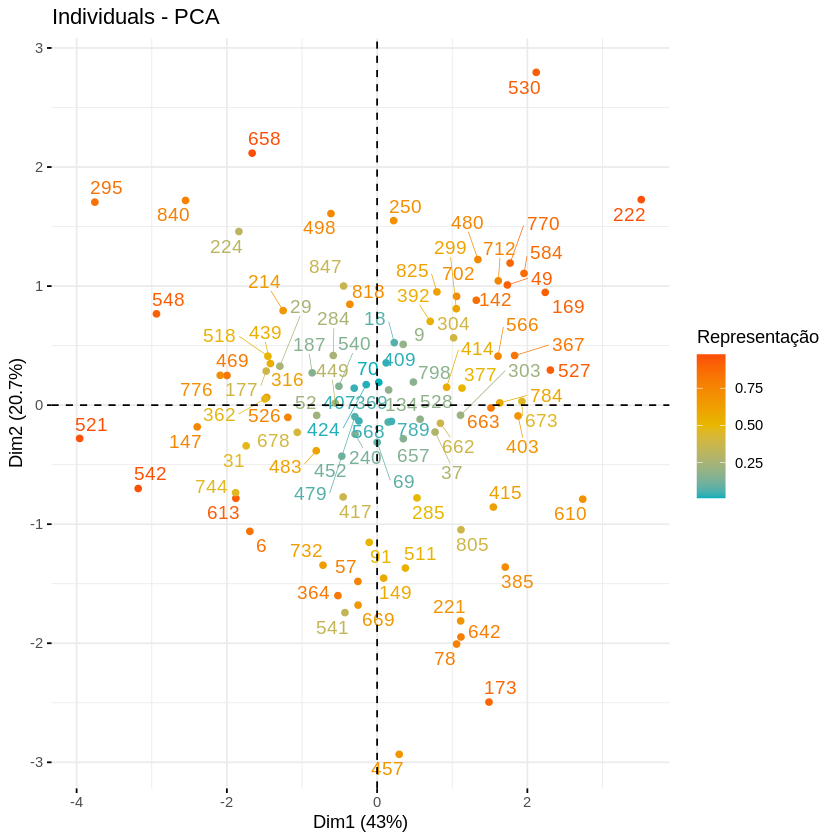

In [518]:
factoextra::fviz_pca_ind(pca_corr,
                         col.ind = "cos2",
                         gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
                         repel = TRUE,
                         legend.title = "Representação"
)

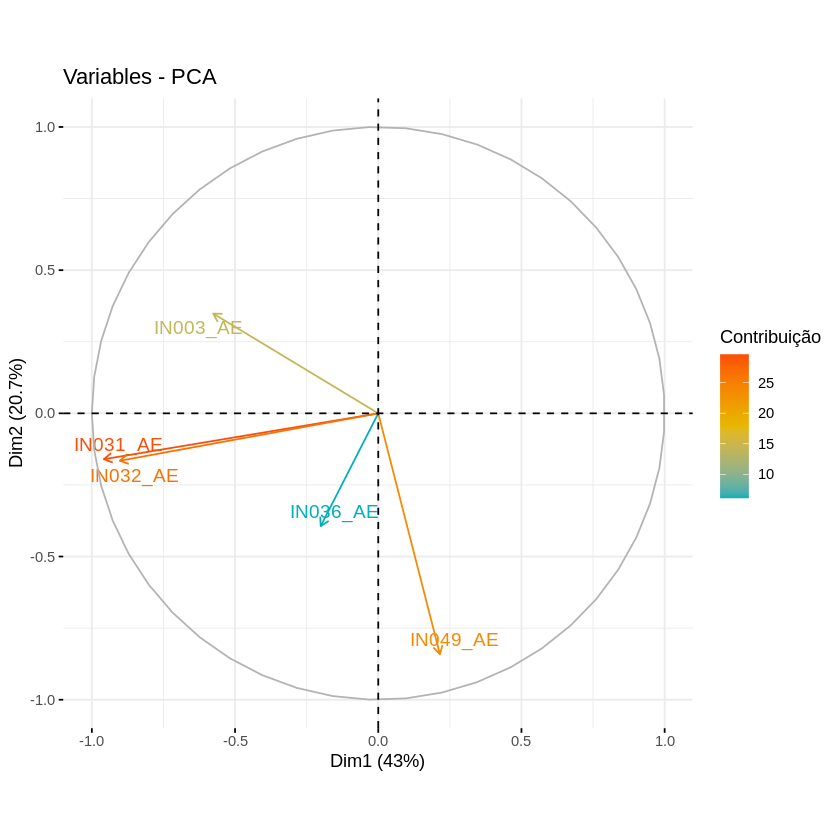

In [519]:
factoextra::fviz_pca_var(pca_corr,
                         col.var = "contrib",
                         gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
                         repel = TRUE,
                         legend.title = "Contribuição"
)

In [520]:
base <- as.data.frame(summary(pca_corr)$x) %>%
  dplyr::select(PC1, PC2, PC3)

In [521]:
dados_pca1 <- cbind(dados_sem_IN055_AE_e_IN056_AE, base)

######## Análise de Clusters ##############

In [522]:
var1 <- "PC1"
var2 <- "PC2"
var3 <- "PC3"

In [523]:
dados_cluster <- dados_pca1[, c(var1, var2, var3)]

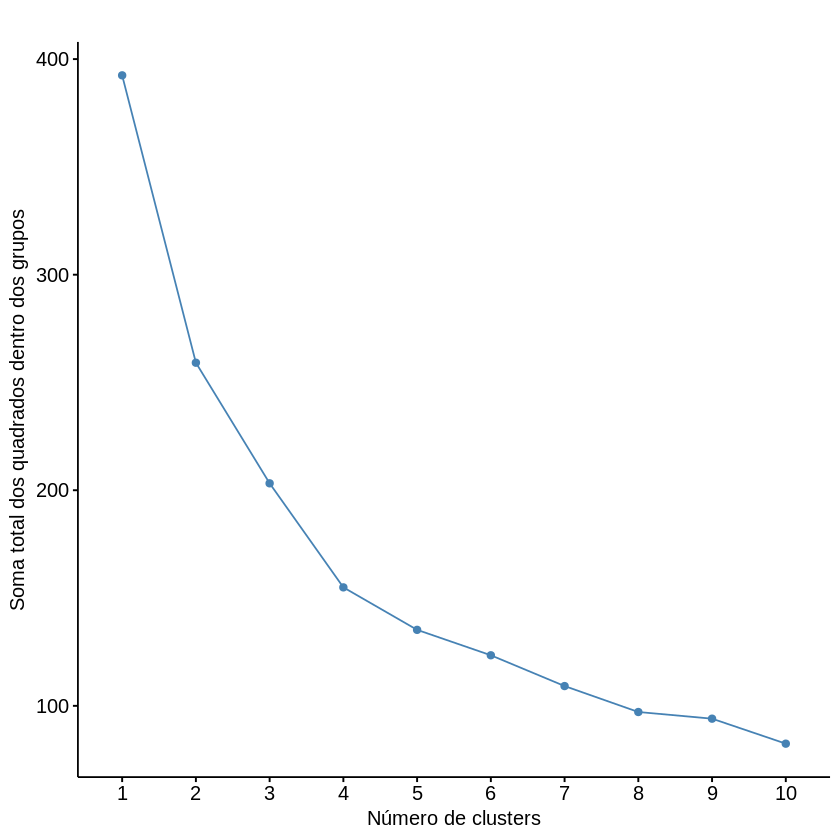

In [524]:
library(factoextra)

# Gerar o gráfico com rótulos em português
fviz_nbclust(dados_cluster, kmeans, method = "wss") +
  labs(
    title = "",
    x = "Número de clusters",
    y = "Soma total dos quadrados dentro dos grupos"
  )

In [525]:
n_clusters <- 4

In [526]:
cluster <- kmeans(dados_cluster, n_clusters)$cluster

In [527]:
kmeans_result <- kmeans(dados_cluster, centers = n_clusters)

In [528]:
dados_pca1$cluster <- as.factor(kmeans_result$cluster)

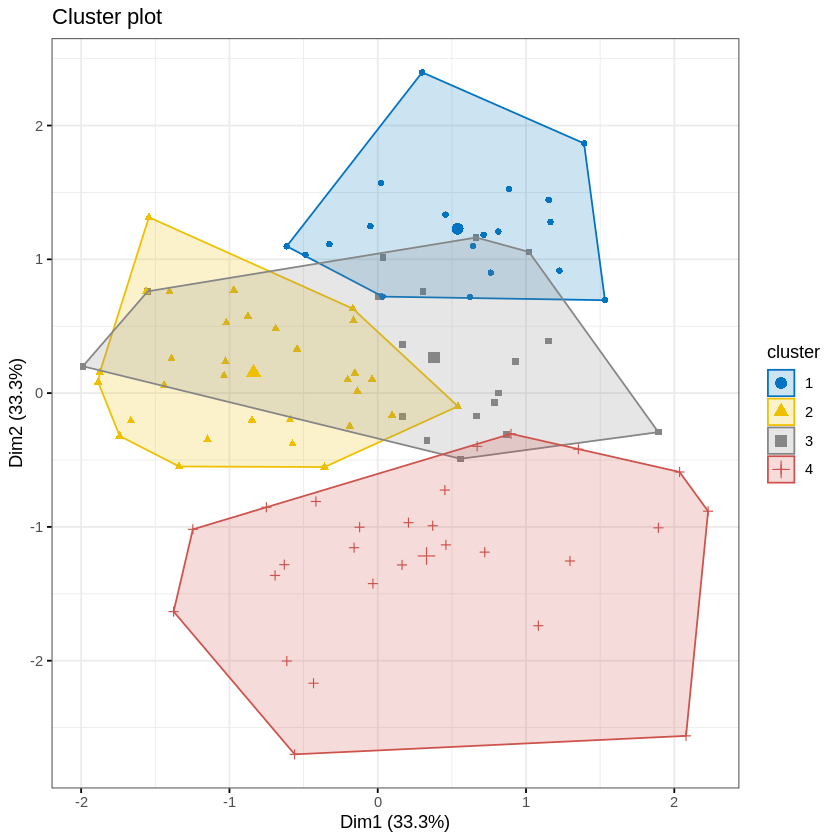

In [529]:
fviz_cluster(kmeans(dados_cluster, n_clusters), data = dados_cluster,
             ellipse.type = "convex",
             geom = "point",
             palette = "jco",
             repel = TRUE,
             ggtheme = theme_bw())

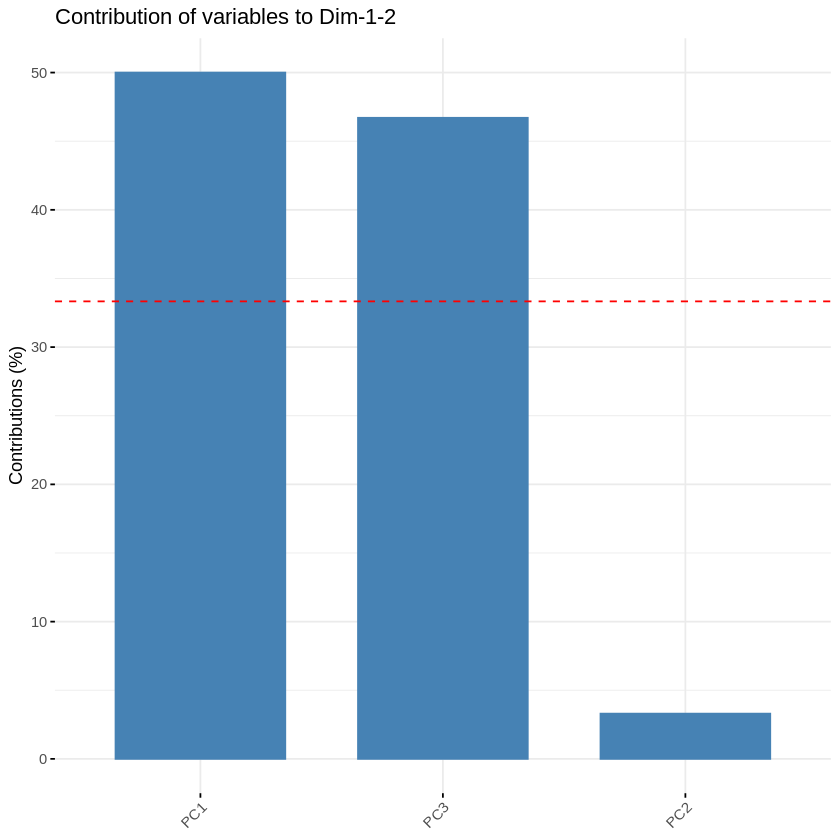

In [530]:
pca_result <- prcomp(dados_cluster, center = TRUE, scale = TRUE)
fviz_contrib(pca_result, choice = "var", axes = 1:2)

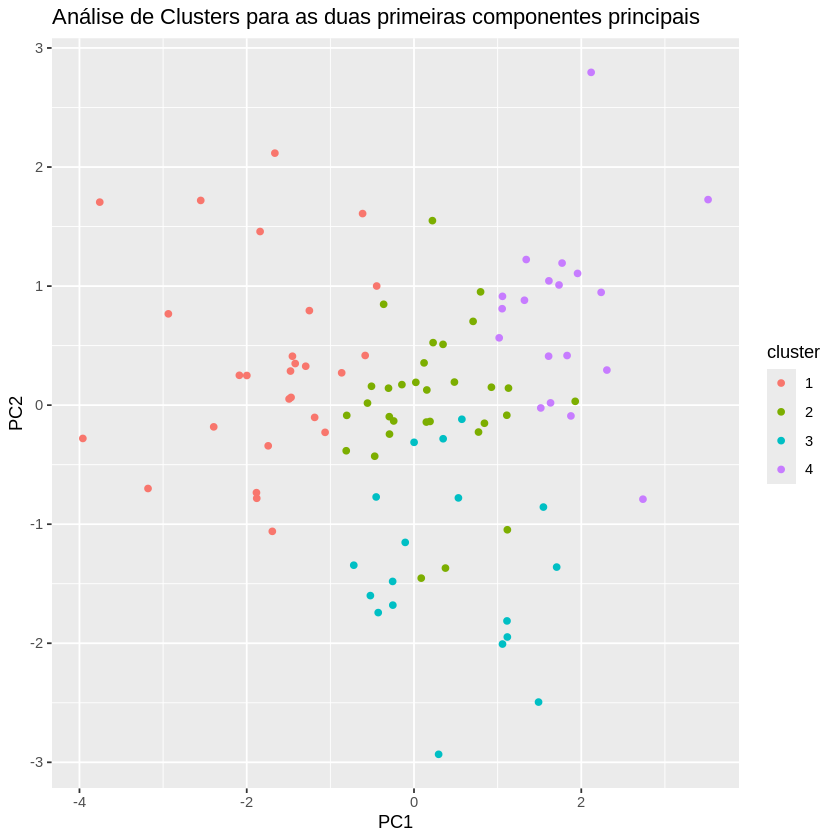

In [531]:
# Plotar os clusters em um gráfico de dispersão (simplificado)

ggplot(dados_pca1, aes(x = .data[[var1]], y = .data[[var2]], color = cluster)) +
  geom_point() +
  labs(title = "Análise de Clusters para as duas primeiras componentes principais",
       x = var1, y = var2)

# Criar a base para o mapa

dados_cluster <- dados_pca1 %>%
  select(all_of(c(var1, var2, var3, "cluster"))) %>%
  mutate(code_muni = index$code_muni) %>%
  left_join(select(index, code_muni, Município), by = "code_muni")

In [532]:
mun_cluster <- inner_join(mun_mg, dados_cluster[c("code_muni")], by = "code_muni")

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


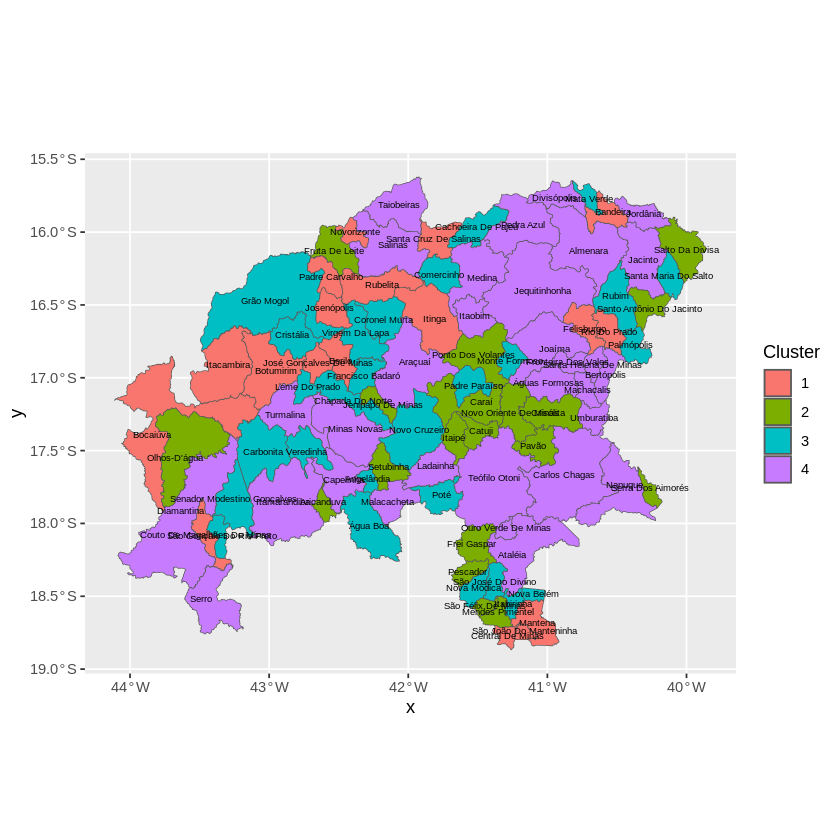

In [533]:
ggplot(mun_cluster) +
  geom_sf(aes(fill = factor(cluster))) +
  scale_fill_discrete(name = "Cluster") +
  geom_sf_text(aes(label = name_muni), size = 2) +
  labs(title = "")


LAGSARLM

In [534]:
df_joined <- dados_cluster %>%
  left_join(select(mun_cluster, code_muni, name_muni, geom), by = "code_muni") %>%
  select(PC1, PC2, PC3, code_muni, name_muni, geom)

# Converter o data frame para sf

df_sf <- st_as_sf(df_joined, crs = 4326)

df_sf <- df_sf[order(row.names(subset_pca)), ]
df_sf <- df_sf %>% mutate(IN055_AE = subset_pca$IN055_AE)

Warning message:
“st_crs<- : replacing crs does not reproject data; use st_transform for that”


In [535]:
print(head(df_sf))

Simple feature collection with 6 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -43.23471 ymin: -18.868 xmax: -40.48757 ymax: -16.97033
Geodetic CRS:  WGS 84
           PC1        PC2         PC3 code_muni        name_muni
14  0.15329912  0.1274170  0.07212195   3112307        Capelinha
15  1.32041052  0.8809613 -0.55614317   3113008            Caraí
16 -2.39480437 -0.1824903  1.36787790   3113503        Carbonita
17  0.08654897 -1.4531507  1.10401060   3113701    Carlos Chagas
18  2.23772730  0.9472216 -0.66269401   3115458           Catuji
19  1.48916943 -2.4941235 -0.68257399   3115706 Central De Minas
                             geom IN055_AE
14 MULTIPOLYGON (((-42.58032 -...    51.63
15 MULTIPOLYGON (((-41.69724 -...    75.55
16 MULTIPOLYGON (((-43.08096 -...    79.50
17 MULTIPOLYGON (((-40.9382 -1...    56.54
18 MULTIPOLYGON (((-41.64807 -...    59.60
19 MULTIPOLYGON (((-41.20091 -...    71.13


In [536]:
nb <- poly2nb(df_sf, queen = TRUE)

In [537]:
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

In [538]:
lagsarlm <- lagsarlm(formula = IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

In [539]:
summary(lagsarlm)


Call:lagsarlm(formula = IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, 
    listw = lw)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.7599 -11.8877  -1.0044  11.9204  43.9226 

Type: lag 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value            Pr(>|z|)
(Intercept) 73.23584    9.59727  7.6309 0.00000000000002331
PC1         -2.75253    1.07318 -2.5648             0.01032
PC2         -1.90778    1.54511 -1.2347             0.21693
PC3          0.93914    1.58349  0.5931             0.55313

Rho: -0.20734, LR test value: 1.7489, p-value: 0.18602
Asymptotic standard error: 0.15594
    z-value: -1.3296, p-value: 0.18366
Wald statistic: 1.7678, p-value: 0.18366

Log likelihood: -394.0398 for lag model
ML residual variance (sigma squared): 232.54, (sigma: 15.249)
Number of observations: 95 
Number of parameters estimated: 6 
AIC: 800.08, (AIC for lm: 799.83)
LM test for residual autocorrelation
test value: 0.13966, p-value: 0.70862


In [540]:
stargazer(lagsarlm, type = "text")


                      Dependent variable:    
                  ---------------------------
                           IN055_AE          
---------------------------------------------
PC1                        -2.753**          
                            (1.073)          
                                             
PC2                         -1.908           
                            (1.545)          
                                             
PC3                          0.939           
                            (1.583)          
                                             
Constant                   73.236***         
                            (9.597)          
                                             
---------------------------------------------
Observations                  95             
Log Likelihood             -394.040          
sigma2                      232.539          
Akaike Inf. Crit.           800.080          
Wald Test               1.768 (df

In [541]:
df_sf$lag_residuals <- residuals(lagsarlm, type = "lagged")

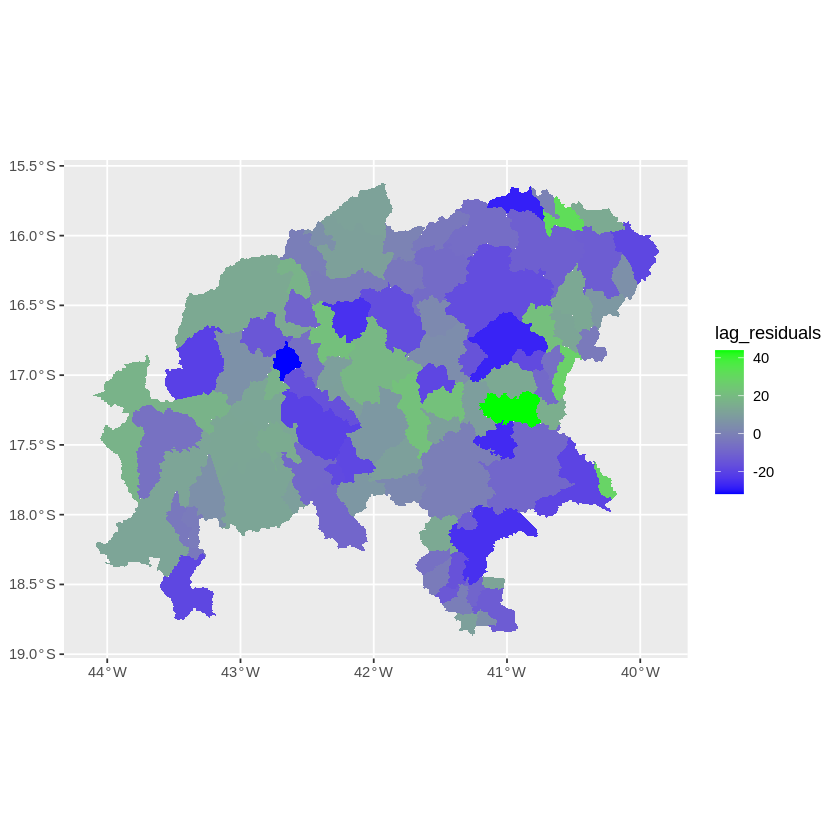

In [542]:
ggplot() +
  geom_sf(data = df_sf, aes(fill = lag_residuals), color = NA) +
  scale_fill_gradient(low = "blue", high = "green")

In [543]:
df_joined <- dados_cluster %>%
  left_join(select(mun_cluster, code_muni, name_muni, geom), by = "code_muni") %>%
  select(PC1, PC2, PC3, code_muni, name_muni, geom)

In [544]:
df_sf <- df_sf %>% mutate(IN056_AE = subset_pca$IN056_AE)

In [545]:
nb <- poly2nb(df_sf, queen = TRUE)

In [546]:
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

lagsarlm <- lagsarlm(IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

summary(lagsarlm)


Call:lagsarlm(formula = IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, 
    listw = lw)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.673 -11.827  -1.627  12.898  49.080 

Type: lag 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value             Pr(>|z|)
(Intercept) 75.84604    7.79964  9.7243 < 0.0000000000000002
PC1         -3.10004    1.32961 -2.3315              0.01973
PC2         -2.98753    1.91463 -1.5604              0.11867
PC3          0.74543    1.96069  0.3802              0.70380

Rho: -0.53035, LR test value: 9.9667, p-value: 0.001594
Asymptotic standard error: 0.15232
    z-value: -3.4817, p-value: 0.00049823
Wald statistic: 12.122, p-value: 0.00049823

Log likelihood: -416.5695 for lag model
ML residual variance (sigma squared): 356.53, (sigma: 18.882)
Number of observations: 95 
Number of parameters estimated: 6 
AIC: 845.14, (AIC for lm: 853.11)
LM test for residual autocorrelation
test value: 1.0488, p-value: 0.30579


In [547]:
model <- lagsarlm(formula = IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

In [548]:
stargazer(lagsarlm, type = "text")


                      Dependent variable:    
                  ---------------------------
                           IN056_AE          
---------------------------------------------
PC1                        -3.100**          
                            (1.330)          
                                             
PC2                         -2.988           
                            (1.915)          
                                             
PC3                          0.745           
                            (1.961)          
                                             
Constant                   75.846***         
                            (7.800)          
                                             
---------------------------------------------
Observations                  95             
Log Likelihood             -416.569          
sigma2                      356.530          
Akaike Inf. Crit.           845.139          
Wald Test             12.122*** (

In [549]:
df_sf$lag_residuals <- residuals(lagsarlm, type = "lagged")

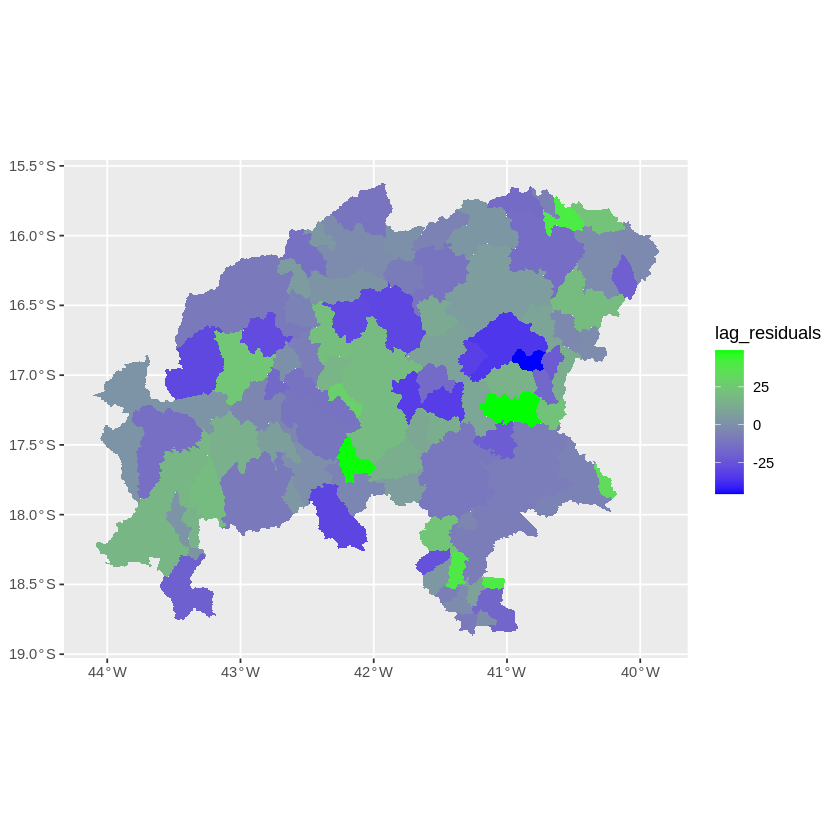

In [550]:
ggplot() +
  geom_sf(data = df_sf, aes(fill = lag_residuals), color = NA) +
  scale_fill_gradient(low = "blue", high = "green")

SAR

In [551]:
# Modelo SAR para IN055_AE
df_joined <- dados_cluster %>%
  left_join(select(mun_cluster, code_muni, name_muni, geom), by = "code_muni") %>%
  select(PC1, PC2, PC3, code_muni, name_muni, geom)

# Converter para objeto sf
df_sf <- st_as_sf(df_joined, crs = 4326)

# Ordenar os dados de acordo com subset_pca
df_sf <- df_sf[order(row.names(subset_pca)), ]

# Adicionar a variável IN055_AE
df_sf <- df_sf %>% mutate(IN055_AE = subset_pca$IN055_AE)

Warning message:
“st_crs<- : replacing crs does not reproject data; use st_transform for that”


In [552]:
# Criar lista de vizinhos
nb <- poly2nb(df_sf, queen = TRUE)

In [553]:
# Converter a lista de vizinhos em matriz de pesos espaciais
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

In [554]:
# Estimando o modelo SAR para IN055_AE
sar_model_IN055 <- lagsarlm(IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

In [555]:
# Exibir o resumo dos resultados
summary(sar_model_IN055)


Call:lagsarlm(formula = IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, 
    listw = lw)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.7599 -11.8877  -1.0044  11.9204  43.9226 

Type: lag 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value            Pr(>|z|)
(Intercept) 73.23584    9.59727  7.6309 0.00000000000002331
PC1         -2.75253    1.07318 -2.5648             0.01032
PC2         -1.90778    1.54511 -1.2347             0.21693
PC3          0.93914    1.58349  0.5931             0.55313

Rho: -0.20734, LR test value: 1.7489, p-value: 0.18602
Asymptotic standard error: 0.15594
    z-value: -1.3296, p-value: 0.18366
Wald statistic: 1.7678, p-value: 0.18366

Log likelihood: -394.0398 for lag model
ML residual variance (sigma squared): 232.54, (sigma: 15.249)
Number of observations: 95 
Number of parameters estimated: 6 
AIC: 800.08, (AIC for lm: 799.83)
LM test for residual autocorrelation
test value: 0.13966, p-value: 0.70862


In [556]:
# Criar uma tabela com os resultados do modelo SAR para IN055_AE
stargazer(sar_model_IN055, type = "text")


                      Dependent variable:    
                  ---------------------------
                           IN055_AE          
---------------------------------------------
PC1                        -2.753**          
                            (1.073)          
                                             
PC2                         -1.908           
                            (1.545)          
                                             
PC3                          0.939           
                            (1.583)          
                                             
Constant                   73.236***         
                            (9.597)          
                                             
---------------------------------------------
Observations                  95             
Log Likelihood             -394.040          
sigma2                      232.539          
Akaike Inf. Crit.           800.080          
Wald Test               1.768 (df

In [557]:
# Calculando os resíduos de IN055 para o modelo SAR
df_sf$lag_residuals_IN055 <- residuals(sar_model_IN055, type = "lagged")

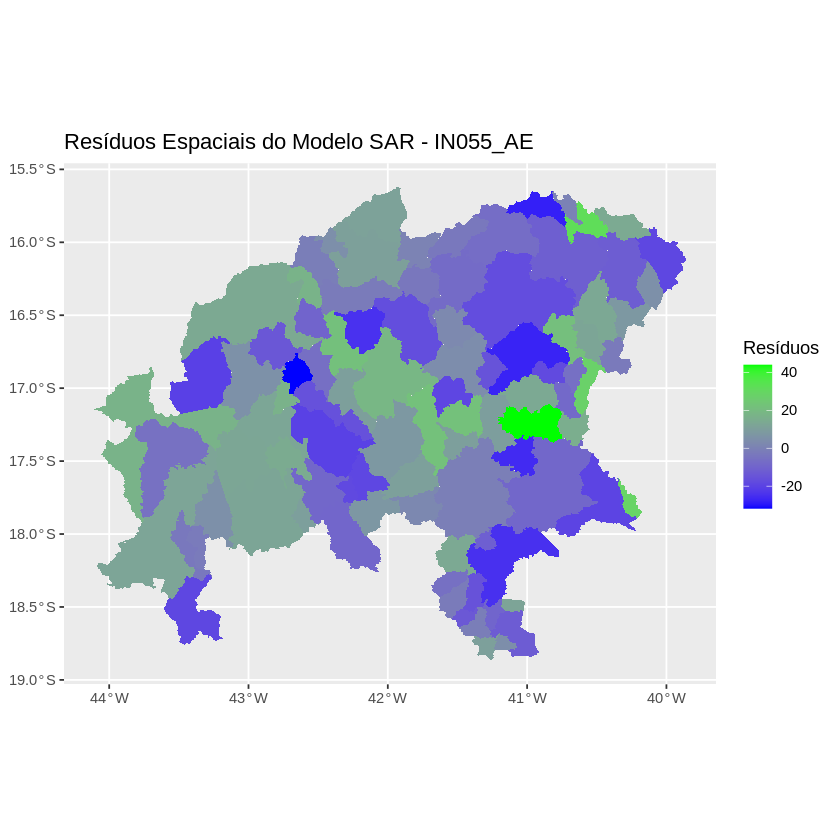

In [558]:
# Plotando os resíduos de IN055 para o modelo SAR
ggplot() +
  geom_sf(data = df_sf, aes(fill = lag_residuals_IN055), color = NA) +
  scale_fill_gradient(low = "blue", high = "green") +
  labs(title = "Resíduos Espaciais do Modelo SAR - IN055_AE", fill = "Resíduos")

In [559]:
# Modelo SAR para IN056_AE
df_sf <- df_sf %>% mutate(IN056_AE = subset_pca$IN056_AE)

In [560]:
# Criar lista de vizinhos para IN056_AE
nb <- poly2nb(df_sf, queen = TRUE)

In [561]:
# Converter a lista de vizinhos em matriz de pesos espaciais para IN056_AE
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

In [562]:
# Estimando o modelo SAR para IN056_AE
sar_model_IN056 <- lagsarlm(IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

In [563]:
# Exibir o resumo dos resultados
summary(sar_model_IN056)


Call:lagsarlm(formula = IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, 
    listw = lw)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.673 -11.827  -1.627  12.898  49.080 

Type: lag 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value             Pr(>|z|)
(Intercept) 75.84604    7.79964  9.7243 < 0.0000000000000002
PC1         -3.10004    1.32961 -2.3315              0.01973
PC2         -2.98753    1.91463 -1.5604              0.11867
PC3          0.74543    1.96069  0.3802              0.70380

Rho: -0.53035, LR test value: 9.9667, p-value: 0.001594
Asymptotic standard error: 0.15232
    z-value: -3.4817, p-value: 0.00049823
Wald statistic: 12.122, p-value: 0.00049823

Log likelihood: -416.5695 for lag model
ML residual variance (sigma squared): 356.53, (sigma: 18.882)
Number of observations: 95 
Number of parameters estimated: 6 
AIC: 845.14, (AIC for lm: 853.11)
LM test for residual autocorrelation
test value: 1.0488, p-value: 0.30579


In [564]:
# Criar uma tabela com os resultados do modelo SAR para IN056_AE
stargazer(sar_model_IN056, type = "text")


                      Dependent variable:    
                  ---------------------------
                           IN056_AE          
---------------------------------------------
PC1                        -3.100**          
                            (1.330)          
                                             
PC2                         -2.988           
                            (1.915)          
                                             
PC3                          0.745           
                            (1.961)          
                                             
Constant                   75.846***         
                            (7.800)          
                                             
---------------------------------------------
Observations                  95             
Log Likelihood             -416.569          
sigma2                      356.530          
Akaike Inf. Crit.           845.139          
Wald Test             12.122*** (

In [565]:
# Calculando os resíduos de IN056 para o modelo SAR
df_sf$lag_residuals_IN056 <- residuals(sar_model_IN056, type = "lagged")

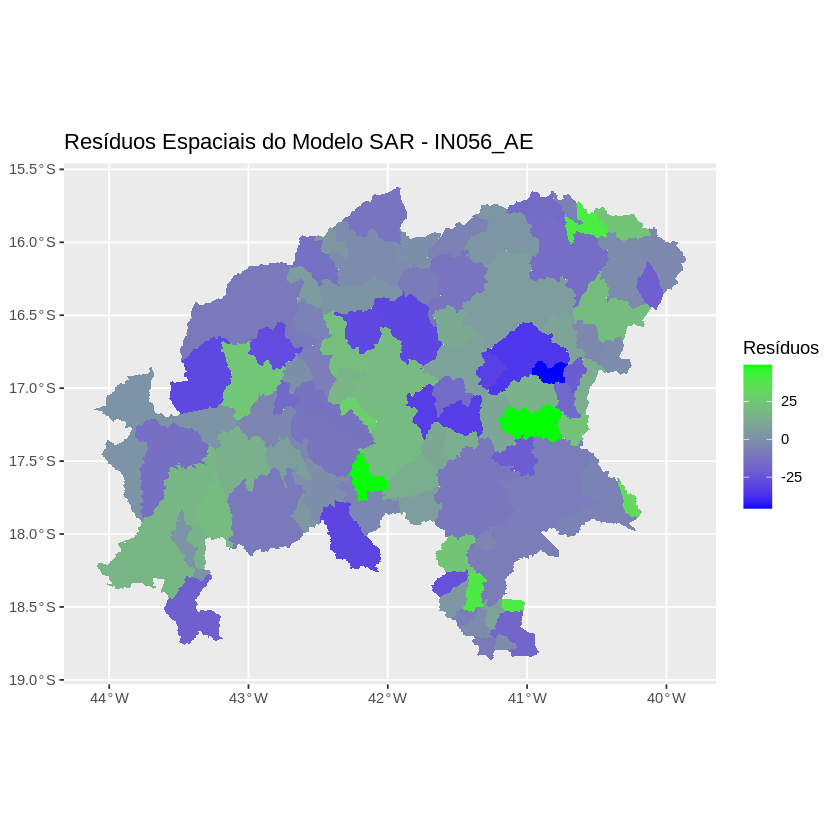

In [566]:
# Plotando os resíduos de IN056 para o modelo SAR
ggplot() +
  geom_sf(data = df_sf, aes(fill = lag_residuals_IN056), color = NA) +
  scale_fill_gradient(low = "blue", high = "green") +
  labs(title = "Resíduos Espaciais do Modelo SAR - IN056_AE", fill = "Resíduos")

SEM

Warning message:
“st_crs<- : replacing crs does not reproject data; use st_transform for that”



Call:errorsarlm(formula = IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, 
    listw = lw)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.9656 -11.7503  -0.5562  11.8034  43.6043 

Type: error 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value              Pr(>|z|)
(Intercept) 60.64903    1.28762 47.1017 < 0.00000000000000022
PC1         -2.82093    1.07772 -2.6175              0.008858
PC2         -1.85894    1.55830 -1.1929              0.232899
PC3          0.92287    1.57274  0.5868              0.557343

Lambda: -0.2145, LR test value: 1.788, p-value: 0.18117
Asymptotic standard error: 0.15851
    z-value: -1.3532, p-value: 0.17598
Wald statistic: 1.8312, p-value: 0.17598

Log likelihood: -394.0203 for error model
ML residual variance (sigma squared): 232.3, (sigma: 15.242)
Number of observations: 95 
Number of parameters estimated: 6 
AIC: 800.04, (AIC for lm: 799.83)



                      Dependent variable:    
                  ---------------------------
                           IN055_AE          
---------------------------------------------
PC1                        -2.821***         
                            (1.078)          
                                             
PC2                         -1.859           
                            (1.558)          
                                             
PC3                          0.923           
                            (1.573)          
                                             
Constant                   60.649***         
                            (1.288)          
                                             
---------------------------------------------
Observations                  95             
Log Likelihood             -394.020          
sigma2                      232.304          
Akaike Inf. Crit.           800.041          
Wald Test               1.831 (df


Call:errorsarlm(formula = IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, 
    listw = lw)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.409 -11.618  -1.444  12.852  47.580 

Type: error 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value             Pr(>|z|)
(Intercept)  49.5499     1.2284 40.3377 < 0.0000000000000002
PC1          -3.3718     1.3208 -2.5528              0.01069
PC2          -2.3967     1.9057 -1.2576              0.20852
PC3           1.0110     1.8870  0.5358              0.59213

Lambda: -0.57037, LR test value: 9.998, p-value: 0.0015671
Asymptotic standard error: 0.15362
    z-value: -3.7128, p-value: 0.00020496
Wald statistic: 13.785, p-value: 0.00020496

Log likelihood: -416.5538 for error model
ML residual variance (sigma squared): 353.31, (sigma: 18.796)
Number of observations: 95 
Number of parameters estimated: 6 
AIC: 845.11, (AIC for lm: 853.11)



                      Dependent variable:    
                  ---------------------------
                           IN056_AE          
---------------------------------------------
PC1                        -3.372**          
                            (1.321)          
                                             
PC2                         -2.397           
                            (1.906)          
                                             
PC3                          1.011           
                            (1.887)          
                                             
Constant                   49.550***         
                            (1.228)          
                                             
---------------------------------------------
Observations                  95             
Log Likelihood             -416.554          
sigma2                      353.308          
Akaike Inf. Crit.           845.108          
Wald Test             13.785*** (

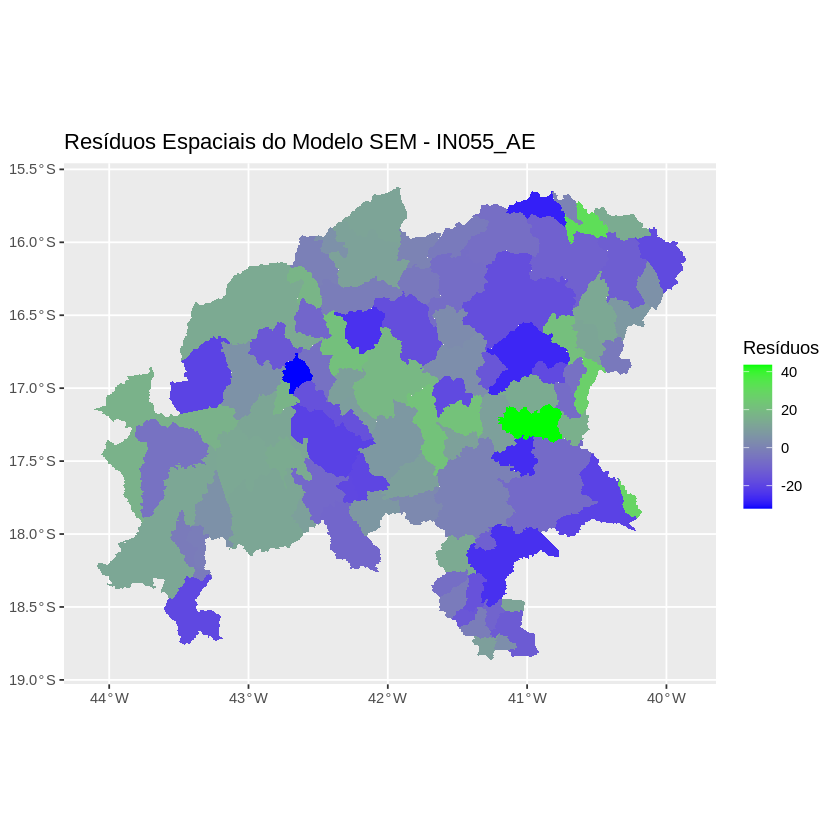

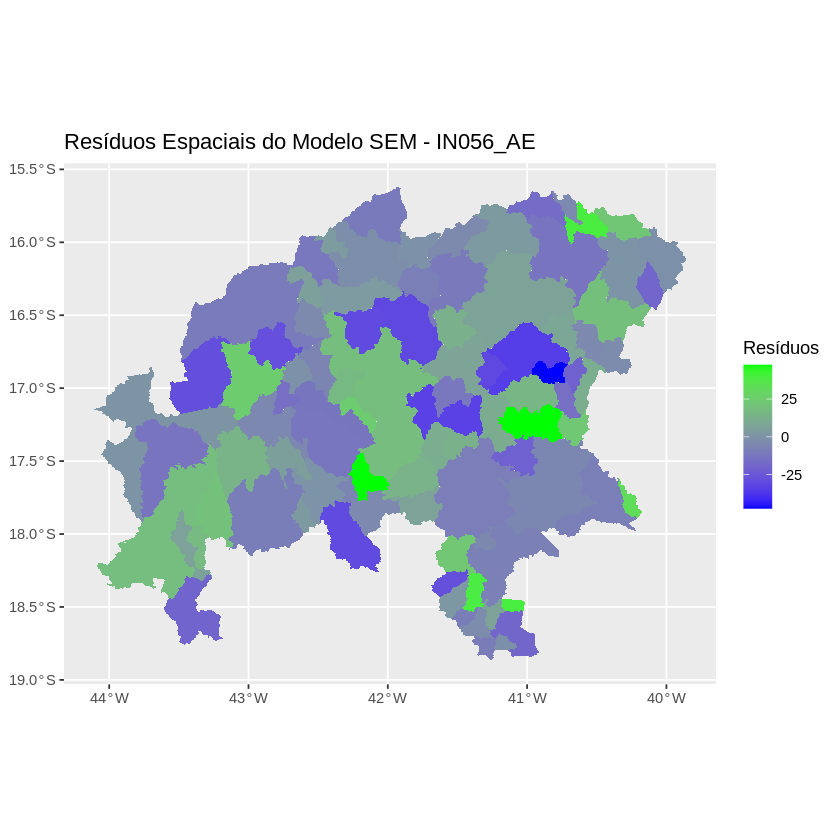

In [567]:
# Modelo SEM para IN055_AE
df_joined <- dados_cluster %>%
  left_join(select(mun_cluster, code_muni, name_muni, geom), by = "code_muni") %>%
  select(PC1, PC2, PC3, code_muni, name_muni, geom)

# Converter para objeto sf
df_sf <- st_as_sf(df_joined, crs = 4326)

# Ordenar os dados de acordo com subset_pca
df_sf <- df_sf[order(row.names(subset_pca)), ]

# Adicionar a variável IN055_AE
df_sf <- df_sf %>% mutate(IN055_AE = subset_pca$IN055_AE)

# Criar lista de vizinhos
nb <- poly2nb(df_sf, queen = TRUE)

# Converter a lista de vizinhos em matriz de pesos espaciais
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

# Estimando o modelo SEM para IN055_AE
sem_model_IN055 <- errorsarlm(IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

# Exibir o resumo dos resultados
summary(sem_model_IN055)

# Criar uma tabela com os resultados do modelo SEM para IN055_AE
stargazer(sem_model_IN055, type = "text")

# Calculando os resíduos de IN055 para o modelo SEM
df_sf$sem_residuals_IN055 <- residuals(sem_model_IN055, type = "response")

# Plotando os resíduos de IN055 para o modelo SEM
ggplot() +
  geom_sf(data = df_sf, aes(fill = sem_residuals_IN055), color = NA) +
  scale_fill_gradient(low = "blue", high = "green") +
  labs(title = "Resíduos Espaciais do Modelo SEM - IN055_AE", fill = "Resíduos")


# Modelo SEM para IN056_AE
df_sf <- df_sf %>% mutate(IN056_AE = subset_pca$IN056_AE)

# Criar lista de vizinhos para IN056_AE
nb <- poly2nb(df_sf, queen = TRUE)

# Converter a lista de vizinhos em matriz de pesos espaciais para IN056_AE
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

# Estimando o modelo SEM para IN056_AE
sem_model_IN056 <- errorsarlm(IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)

# Exibir o resumo dos resultados
summary(sem_model_IN056)

# Criar uma tabela com os resultados do modelo SEM para IN056_AE
stargazer(sem_model_IN056, type = "text")

# Calculando os resíduos de IN056 para o modelo SEM
df_sf$sem_residuals_IN056 <- residuals(sem_model_IN056, type = "response")

# Plotando os resíduos de IN056 para o modelo SEM
ggplot() +
  geom_sf(data = df_sf, aes(fill = sem_residuals_IN056), color = NA) +
  scale_fill_gradient(low = "blue", high = "green") +
  labs(title = "Resíduos Espaciais do Modelo SEM - IN056_AE", fill = "Resíduos")


SDM


Call:lagsarlm(formula = IN055_AE ~ PC1 + PC2 + PC3 + PC1_lag + PC2_lag + 
    PC3_lag, data = df_sf, listw = lw)

Residuals:
     Min       1Q   Median       3Q      Max 
-33.1602 -11.2844  -1.1451  11.5089  43.4609 

Type: lag 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value           Pr(>|z|)
(Intercept)  73.0808     9.7232  7.5161 0.0000000000000564
PC1          -2.7302     1.0965 -2.4898            0.01278
PC2          -1.8196     1.5576 -1.1682            0.24272
PC3           1.0168     1.6014  0.6349            0.52547
PC1_lag      -1.0525     2.7424 -0.3838            0.70114
PC2_lag       1.1360     3.2554  0.3490            0.72711
PC3_lag      -1.2389     3.5970 -0.3444            0.73053

Rho: -0.20388, LR test value: 1.6064, p-value: 0.205
Asymptotic standard error: 0.15816
    z-value: -1.289, p-value: 0.19739
Wald statistic: 1.6616, p-value: 0.19739

Log likelihood: -393.7645 for lag model
ML residual variance (sigma squared): 231.26,


                      Dependent variable:    
                  ---------------------------
                           IN055_AE          
---------------------------------------------
PC1                        -2.730**          
                            (1.097)          
                                             
PC2                         -1.820           
                            (1.558)          
                                             
PC3                          1.017           
                            (1.601)          
                                             
PC1_lag                     -1.053           
                            (2.742)          
                                             
PC2_lag                      1.136           
                            (3.255)          
                                             
PC3_lag                     -1.239           
                            (3.597)          
                                 


Call:lagsarlm(formula = IN056_AE ~ PC1 + PC2 + PC3 + PC1_lag + PC2_lag + 
    PC3_lag, data = df_sf, listw = lw)

Residuals:
     Min       1Q   Median       3Q      Max 
-47.1866 -12.7617  -1.6653  11.9074  46.5840 

Type: lag 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value             Pr(>|z|)
(Intercept) 76.80904    7.85670  9.7763 < 0.0000000000000002
PC1         -3.30149    1.34625 -2.4524              0.01419
PC2         -2.76061    1.91620 -1.4407              0.14968
PC3          0.95092    1.96476  0.4840              0.62840
PC1_lag     -3.22490    3.36118 -0.9595              0.33733
PC2_lag      3.32061    4.00875  0.8283              0.40748
PC3_lag      1.64421    4.41704  0.3722              0.70971

Rho: -0.55029, LR test value: 9.3495, p-value: 0.0022305
Asymptotic standard error: 0.15389
    z-value: -3.576, p-value: 0.00034892
Wald statistic: 12.788, p-value: 0.00034892

Log likelihood: -415.6803 for lag model
ML residual varianc


                      Dependent variable:    
                  ---------------------------
                           IN056_AE          
---------------------------------------------
PC1                        -3.301**          
                            (1.346)          
                                             
PC2                         -2.761           
                            (1.916)          
                                             
PC3                          0.951           
                            (1.965)          
                                             
PC1_lag                     -3.225           
                            (3.361)          
                                             
PC2_lag                      3.321           
                            (4.009)          
                                             
PC3_lag                      1.644           
                            (4.417)          
                                 

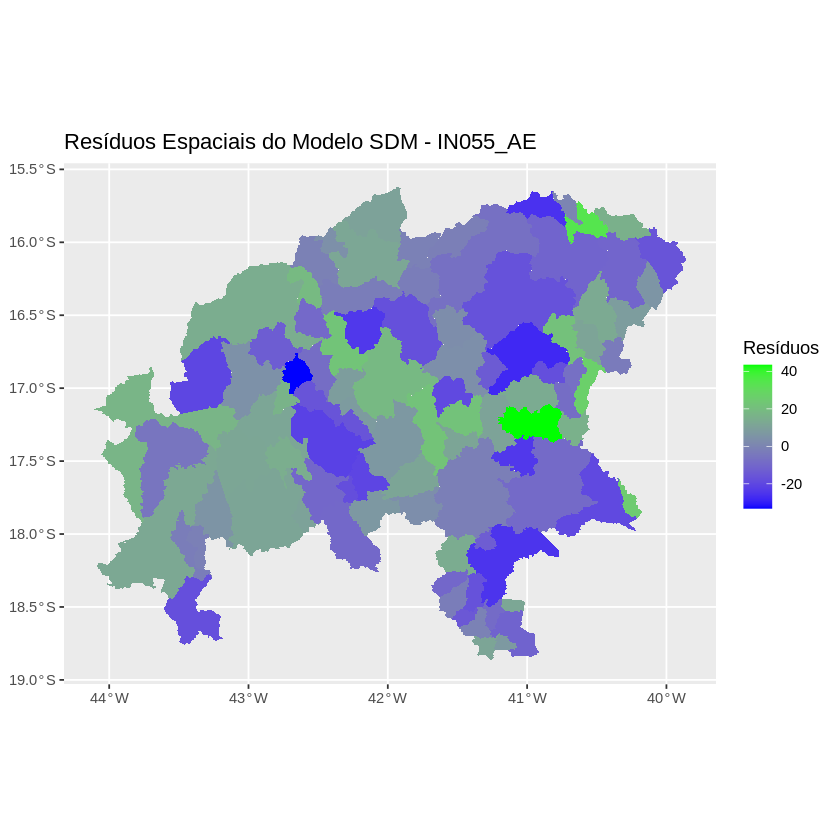

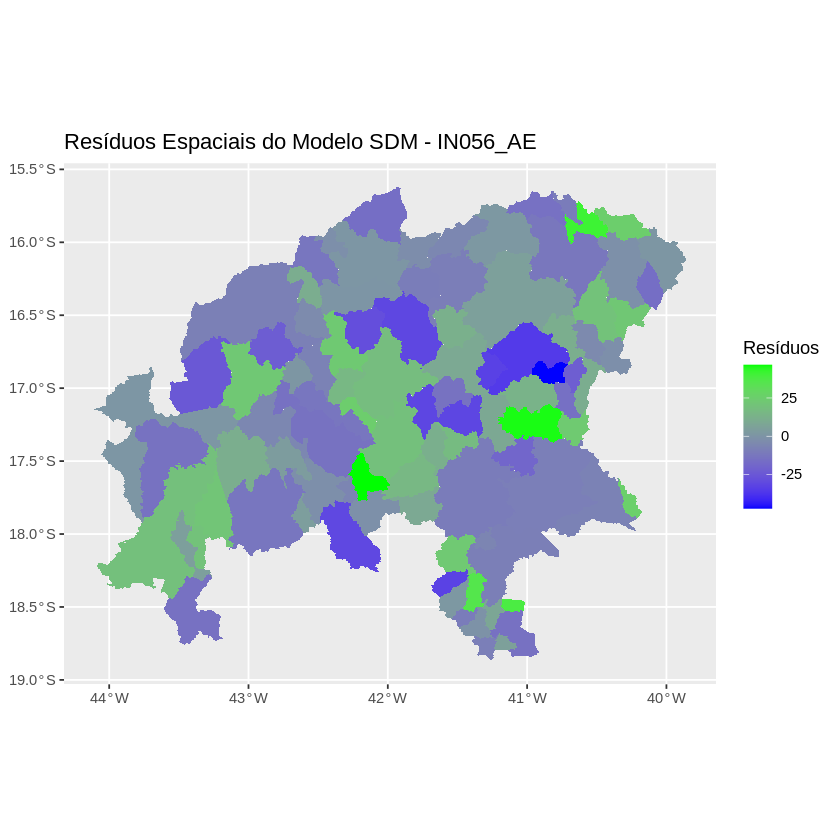

In [568]:
# Modelo SDM para IN055_AE
df_joined <- dados_cluster %>%
  left_join(select(mun_cluster, code_muni, name_muni, geom), by = "code_muni") %>%
  select(PC1, PC2, PC3, code_muni, name_muni, geom)

# Converter para objeto sf com reprojeção
df_sf <- st_as_sf(df_joined) %>%
  st_transform(crs = 4326)  # Use st_transform para reprojetar corretamente o sistema de coordenadas

# Ordenar os dados de acordo com subset_pca
df_sf <- df_sf[order(row.names(subset_pca)), ]

# Adicionar a variável IN055_AE
df_sf <- df_sf %>% mutate(IN055_AE = subset_pca$IN055_AE)

# Criar lista de vizinhos
nb <- poly2nb(df_sf, queen = TRUE)

# Converter a lista de vizinhos em matriz de pesos espaciais
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

# Aplicar defasagem espacial nas variáveis independentes
PC1_lag <- lag.listw(lw, df_sf$PC1)
PC2_lag <- lag.listw(lw, df_sf$PC2)
PC3_lag <- lag.listw(lw, df_sf$PC3)

# Estimando o modelo SDM para IN055_AE (inclui defasagens espaciais das variáveis independentes)
sdm_model_IN055 <- lagsarlm(IN055_AE ~ PC1 + PC2 + PC3 + PC1_lag + PC2_lag + PC3_lag,
                            data = df_sf, listw = lw)

# Exibir o resumo dos resultados
summary(sdm_model_IN055)

# Criar uma tabela com os resultados do modelo SDM para IN055_AE
stargazer(sdm_model_IN055, type = "text")

# Calculando os resíduos de IN055 para o modelo SDM
df_sf$sdm_residuals_IN055 <- residuals(sdm_model_IN055, type = "response")

# Plotando os resíduos de IN055 para o modelo SDM
ggplot() +
  geom_sf(data = df_sf, aes(fill = sdm_residuals_IN055), color = NA) +
  scale_fill_gradient(low = "blue", high = "green") +
  labs(title = "Resíduos Espaciais do Modelo SDM - IN055_AE", fill = "Resíduos")


# Modelo SDM para IN056_AE
df_sf <- df_sf %>% mutate(IN056_AE = subset_pca$IN056_AE)

# Aplicar defasagem espacial nas variáveis independentes para IN056
PC1_lag <- lag.listw(lw, df_sf$PC1)
PC2_lag <- lag.listw(lw, df_sf$PC2)
PC3_lag <- lag.listw(lw, df_sf$PC3)

# Estimando o modelo SDM para IN056_AE (inclui defasagens espaciais das variáveis independentes)
sdm_model_IN056 <- lagsarlm(IN056_AE ~ PC1 + PC2 + PC3 + PC1_lag + PC2_lag + PC3_lag,
                            data = df_sf, listw = lw)

# Exibir o resumo dos resultados
summary(sdm_model_IN056)

# Criar uma tabela com os resultados do modelo SDM para IN056_AE
stargazer(sdm_model_IN056, type = "text")

# Calculando os resíduos de IN056 para o modelo SDM
df_sf$sdm_residuals_IN056 <- residuals(sdm_model_IN056, type = "response")

# Plotando os resíduos de IN056 para o modelo SDM
ggplot() +
  geom_sf(data = df_sf, aes(fill = sdm_residuals_IN056), color = NA) +
  scale_fill_gradient(low = "blue", high = "green") +
  labs(title = "Resíduos Espaciais do Modelo SDM - IN056_AE", fill = "Resíduos")

In [569]:
# Comparação para as duas variáveis IN055_AE e IN056_AE

# Comparação para IN055_AE
lagsarlm_model_IN055 <- lagsarlm(IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)
sar_model_IN055 <- errorsarlm(IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw, method = "eigen") # SAR
sem_model_IN055 <- errorsarlm(IN055_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw) # SEM
sdm_model_IN055 <- lagsarlm(IN055_AE ~ PC1 + PC2 + PC3 + PC1_lag + PC2_lag + PC3_lag, data = df_sf, listw = lw)

# Log-Likelihood e AIC para IN055_AE
loglik_lagsarlm_IN055 <- logLik(lagsarlm_model_IN055)
loglik_sar_IN055 <- logLik(sar_model_IN055)
loglik_sem_IN055 <- logLik(sem_model_IN055)
loglik_sdm_IN055 <- logLik(sdm_model_IN055)
aic_lagsarlm_IN055 <- AIC(lagsarlm_model_IN055)
aic_sar_IN055 <- AIC(sar_model_IN055)
aic_sem_IN055 <- AIC(sem_model_IN055)
aic_sdm_IN055 <- AIC(sdm_model_IN055)

# Teste de Moran's I para os resíduos de IN055_AE
moran_lagsarlm_IN055 <- moran.test(residuals(lagsarlm_model_IN055), lw)
moran_sar_IN055 <- moran.test(residuals(sar_model_IN055), lw)
moran_sem_IN055 <- moran.test(residuals(sem_model_IN055), lw)
moran_sdm_IN055 <- moran.test(residuals(sdm_model_IN055), lw)

# Comparação para IN056_AE
lagsarlm_model_IN056 <- lagsarlm(IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw)
sar_model_IN056 <- errorsarlm(IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw, method = "eigen") # SAR
sem_model_IN056 <- errorsarlm(IN056_AE ~ PC1 + PC2 + PC3, data = df_sf, listw = lw) # SEM
sdm_model_IN056 <- lagsarlm(IN056_AE ~ PC1 + PC2 + PC3 + PC1_lag + PC2_lag + PC3_lag, data = df_sf, listw = lw)

# Log-Likelihood e AIC para IN056_AE
loglik_lagsarlm_IN056 <- logLik(lagsarlm_model_IN056)
loglik_sar_IN056 <- logLik(sar_model_IN056)
loglik_sem_IN056 <- logLik(sem_model_IN056)
loglik_sdm_IN056 <- logLik(sdm_model_IN056)
aic_lagsarlm_IN056 <- AIC(lagsarlm_model_IN056)
aic_sar_IN056 <- AIC(sar_model_IN056)
aic_sem_IN056 <- AIC(sem_model_IN056)
aic_sdm_IN056 <- AIC(sdm_model_IN056)

# Teste de Moran's I para os resíduos de IN056_AE
moran_lagsarlm_IN056 <- moran.test(residuals(lagsarlm_model_IN056), lw)
moran_sar_IN056 <- moran.test(residuals(sar_model_IN056), lw)
moran_sem_IN056 <- moran.test(residuals(sem_model_IN056), lw)
moran_sdm_IN056 <- moran.test(residuals(sdm_model_IN056), lw)

# Exibindo a comparação dos modelos para IN055_AE
comparison_df_IN055 <- data.frame(
  Modelo = c("LAGSARLM", "SAR", "SEM", "SDM"),
  LogLikelihood = c(as.numeric(loglik_lagsarlm_IN055), as.numeric(loglik_sar_IN055), as.numeric(loglik_sem_IN055), as.numeric(loglik_sdm_IN055)),
  AIC = c(aic_lagsarlm_IN055, aic_sar_IN055, aic_sem_IN055, aic_sdm_IN055),
  Moran_I_p_value = c(moran_lagsarlm_IN055$p.value, moran_sar_IN055$p.value, moran_sem_IN055$p.value, moran_sdm_IN055$p.value)
)

# Exibindo a comparação dos modelos para IN056_AE
comparison_df_IN056 <- data.frame(
  Modelo = c("LAGSARLM", "SAR", "SEM", "SDM"),
  LogLikelihood = c(as.numeric(loglik_lagsarlm_IN056), as.numeric(loglik_sar_IN056), as.numeric(loglik_sem_IN056), as.numeric(loglik_sdm_IN056)),
  AIC = c(aic_lagsarlm_IN056, aic_sar_IN056, aic_sem_IN056, aic_sdm_IN056),
  Moran_I_p_value = c(moran_lagsarlm_IN056$p.value, moran_sar_IN056$p.value, moran_sem_IN056$p.value, moran_sdm_IN056$p.value)
)

# Exibindo as tabelas comparativas
print("Comparação para IN055_AE:")
print(comparison_df_IN055)

print("Comparação para IN056_AE:")
print(comparison_df_IN056)


[1] "Comparação para IN055_AE:"
    Modelo LogLikelihood      AIC Moran_I_p_value
1 LAGSARLM     -394.0398 800.0797       0.4669407
2      SAR     -394.0203 800.0406       0.4626285
3      SEM     -394.0203 800.0406       0.4626285
4      SDM     -393.7645 805.5290       0.4285127
[1] "Comparação para IN056_AE:"
    Modelo LogLikelihood      AIC Moran_I_p_value
1 LAGSARLM     -416.5695 845.1389       0.5591065
2      SAR     -416.5538 845.1076       0.5929259
3      SEM     -416.5538 845.1076       0.5929259
4      SDM     -415.6803 849.3606       0.5521691
